#**INGENIERÍA DEL DATO**

In [ ]:
import pandas as pd

# Carga del archivo Excel para inspeccionar los datos
file_path = '/content/Europe sucio.xlsx'
data = pd.read_excel(file_path)

# Visualización inicial de los datos para entender la estructura y contenido
data.head()

# Resumen de las columnas y tipos de datos
column_summary = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nombre            1893 non-null   object        
 1   equipo            1893 non-null   object        
 2   liga              1893 non-null   object        
 3   posicion          1893 non-null   object        
 4   fecha_nacimiento  1893 non-null   datetime64[ns]
 5   edad              1893 non-null   float64       
 6   cantera           1893 non-null   object        
 7   ficha             1893 non-null   object        
 8   datos             1893 non-null   object        
 9   valor_actual      1890 non-null   float64       
 10  nacionalidad      1893 non-null   object        
 11  valor_equipo      1893 non-null   float64       
 12  agencia           1750 non-null   object        
 13  altura            1838 non-null   object        
 14  internacional     1893 n

In [ ]:
# Identificación de los nombres únicos en las columnas 'equipo' y 'cantera'
equipos = set(data['equipo'].unique())
canteras = set(data['cantera'].unique())

# Visualización de los nombres de equipos y canteras para identificar inconsistencias
equipos, canteras

({'AZ',
  'Ajaccio',
  'Ajax',
  'Alavés',
  'Albacete',
  'Alcorcón',
  'Almere City',
  'Almeria',
  'Amiens',
  'Amorebieta',
  'Anderlech',
  'Andorra',
  'Angers',
  'Annecy',
  'Arouca',
  'Arsenal',
  'Ascoli',
  'Aston Villa',
  'Atalanta',
  'Athletic Club',
  'Atletico de Madrid',
  'Atlético de Madrid',
  'Augsburgo',
  'Auxerre',
  'Bari',
  'Barnsley',
  'Bastia',
  'Bayern Munich',
  'Betis',
  'Birmingham',
  'Blackburn',
  'Blackpool',
  'Boavista',
  'Bochum',
  'Bolonia',
  'Bolton Wanderers',
  "Borussia M'gladbach",
  'Bournemouth',
  'Brentford',
  'Brescia',
  'Brighton',
  'Bristol City',
  'Bristol Rovers',
  'Brujas',
  'Burgos ',
  'Burnley',
  'Burton Albion',
  'CA Osasuna',
  'CD Leganés',
  'CF Estrela',
  'Cadiz',
  'Caen',
  'Cagliari',
  'Cambridge United',
  'Cardiff City',
  'Carlisle United',
  'Cartagena',
  'Casa Pia',
  'Catanzaro',
  'Celta de Vigo',
  'Charlton Athletic',
  'Chaves',
  'Chelsea',
  'Cheltenham Town',
  'Circulo Brujas',
  'Citta

In [ ]:
# Unificación y estandarización los nombres de los equipos en las columnas 'equipo' y 'cantera'
# Función de mapeo para estandarizar los nombres

def estandarizar_nombre_equipo(nombre):
    nombre = nombre.strip()
    mapeo_nombres = {
        "Atletico de Madrid": "Atlético de Madrid",
        "Atlético Madrid": "Atlético de Madrid",
        "Barcelona": "FC Barcelona",
        "Real Madrid CF": "Real Madrid",
        "Madrid": "Real Madrid",
        "Girona": "Girona FC",
        "Milan": "AC Milan",
        "Milán": "AC Milan",
        "Sevilla": "Sevilla FC",
        "Valencia": "Valencia CF",
        "Villareal": "Villarreal CF",
        "Arsenal": "Arsenal FC",
        "Manchester City FC": "Manchester City",
        "Manchester United FC": "Manchester United",
        "Arsenal FC": "Arsenal",
        "Lyon": "Olympique Lyon",
        "Dortmund": "Borussia Dortmund",
        "Bayer Munich": "Bayern Munich",
        "SL Benfica": "Benfica",
        "FC Porto": "Oporto",
        "Bénfica": "Benfica",
        "Marsella": "Olympique Marsella",
        "Espanyol": "RCD Espanyol",
        "Nápoles": "Napoles",
        "Rennes": "Stade Rennes",
        "Inter de Milan": "Inter",
        "Standard de Leige": "Standard de Lieja",
        "Leverksuen": "Bayer Leverkusen",
        "Girondins": "Girondins Burdeos",
      }

    return mapeo_nombres.get(nombre, nombre)

# Aplicación de la función de mapeo a las columnas 'equipo' y 'cantera'
data['equipo'] = data['equipo'].apply(estandarizar_nombre_equipo)
data['cantera'] = data['cantera'].apply(estandarizar_nombre_equipo)

# Verificación de los cambios
data[['equipo', 'cantera']].head()


,equipo,cantera
0,Girona FC,Real Madrid
1,Girona FC,Valencia CF
2,Girona FC,Real Madrid
3,Girona FC,FC Barcelona
4,Girona FC,FC Barcelona


In [ ]:
# Búsqueda de nombres duplicados en el dataset
nombres_duplicados = data[data.duplicated(subset=['nombre'])]

# Nombres duplicados para su posterior corrección
nombres_duplicados

,nombre,equipo,liga,posicion,fecha_nacimiento,edad,cantera,ficha,datos,valor_actual,...,valor_equipo,agencia,altura,internacional,edad_debut,comunitario,traspasos,ELO,potencial,raza
205,Ignasi Miquel,Granada,Primera España,Defensa central,1992-09-28,31.00000,Arsenal FC,https://www.transfermarkt.es/ignasi-miquel/pro...,14,1.4,...,68.10,NaN,189,No,16.9,Sí,12,69,73,Blanco
206,Álvaro Carreras,Granada,Primera España,Lateral izquierdo,2003-03-23,20.00000,Manchester United,https://www.transfermarkt.es/alvaro-carreras/p...,No debuta,7.0,...,68.10,Be Loyal by Ginés Carvajal,186,No,17.5,Sí,4,63,76,Blanco
209,José Pozo,Rayo Vallecano,Primera España,Mediocentro ofensivo,1996-03-15,27.00000,Manchester City,https://www.transfermarkt.es/jose-pozo/profil/...,4,1.0,...,83.40,YouFirst,171,No,16.5,Sí,5,48,69,Blanco
211,Pablo Maffeo,Mallorca,Primera España,Lateral derecho,1997-07-12,26.00000,Manchester City,https://www.transfermarkt.es/pablo-maffeo/prof...,3,8.0,...,92.80,Promoesport,172,Sí,15.7,Sí,9,75,78,Blanco
218,Sergi Canós,Valencia CF,Primera España,Extremo izquierdo,1997-02-02,26.00000,Liverpool,https://www.transfermarkt.es/sergi-canos/profi...,1,4.0,...,177.90,Gelu Rodríguez,177,No,17.5,Sí,6,65,76,Blanco
220,Arnau Puigmal,Almeria,Primera España,Mediocentro ofensivo,2001-01-10,23.00000,Manchester United,https://www.transfermarkt.es/arnau-puigmal/pro...,No debuta,2.0,...,95.10,Revolution Football Boutique,173,No,16.7,Sí,2,51,63,Blanco
448,Paulino de la Fuente,Real Oviedo,Segunda España,Extremo derecho,1997-06-27,26.00000,Inter,https://www.transfermarkt.es/paulino-de-la-fue...,No debuta,1.5,...,29.80,Leaderbrock,184,No,18.2,Sí,7,61,66,Blanco
453,José Marsà,Andorra,Segunda España,Defensa central,2002-03-04,21.00000,Sporting Portugal,https://www.transfermarkt.es/jose-marsa/profil...,8,1.5,...,18.30,The Player Management,185,No,16.5,Sí,3,51,65,Blanco
455,Pablo Moreno,Andorra,Segunda España,Delantero centro,2002-05-03,21.00000,Juventus/Manchester City,https://www.transfermarkt.es/pablo-moreno/prof...,No debuta,0.7,...,18.30,Footfeel ISM,178,No,16.4,Sí,6,44,59,Blanco
462,Matheus Pereira,Eibar,Segunda España,Mediocentro,1998-02-25,25.00000,Girondins/Juventus,https://www.transfermarkt.es/matheus-pereira/p...,Juventus 3,1.2,...,29.50,Elenko Sports Ltda,183,No,17.2,No,9,69,73,Negro


Limpio todos los jugadores duplicados que he podido detectar a través de este código. También he observado que, en el caso de Nuno Santos y Adama Traoré, se trata de jugadores diferentes que comparten el mismo nombre. Por ello, estos jugadores no serán eliminados y permanecerán ambos en la base de datos.

In [ ]:
# Revisión de valores faltantes
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values_info = {
    "Total Missing Values": missing_values.sum(),
    "Columns with Missing Values": missing_values
    }

# Comprobación
missing_values_info


{'Total Missing Values': 202,
 'Columns with Missing Values': valor_actual      3
 agencia         143
 altura           55
 edad_debut        1
 dtype: int64}

Procedo a corregir la agencia sustituyendo los espacios en blancos por la palabra "Desconocido". Reviso la columna de altura y me aseguro que cada jugador tiene asignada una altura.


In [ ]:
# Sustitución de valores nulos en la columna "agencia" por la palabra "desconocido"

data['agencia'] = data['agencia'].fillna('desconocido')

# Corrección de la acentuación de "Sí"
# Reemplazar cualquier "Si" por "Sí" en todas las columnas
for columna in data.select_dtypes(include=['object']).columns:
    data[columna] = data[columna].str.replace('Si', 'Sí', regex=False)

In [ ]:
# Identificación de la fila donde "edad_debut" es nulo
fila_con_edad_debut_nula = data[data['edad_debut'].isnull()]
fila_con_edad_debut_nula[['nombre', 'equipo', 'posicion', 'edad_debut']]

# Revisión de su edad de debut en BeSoccer Pro
data['edad_debut'].fillna(15, inplace=True)

# Verificación de los cambios
data.loc[786, ['nombre', 'equipo', 'posicion', 'edad_debut']]

nombre        Mikki van Sas
equipo            Feyenoord
posicion            Portero
edad_debut             15.0
Name: 786, dtype: object

In [ ]:
# Identifico las filas donde 'valor_actual' es nulo
filas_con_valor_actual_nulo = data[data['valor_actual'].isnull()]

filas_con_valor_actual_nulo[['nombre', 'equipo', 'posicion', 'valor_actual']]

# Actualización del 'valor_actual' para cada uno de los jugadores
data.loc[data['nombre'] == 'Juanma García', 'valor_actual'] = 0.7
data.loc[data['nombre'] == 'Marcos Navarro', 'valor_actual'] = 0.1
data.loc[data['nombre'] == 'Óscar Clemente', 'valor_actual'] = 0.8

# Verificación de los cambios
data.loc[[401, 419, 423], ['nombre', 'equipo', 'posicion', 'valor_actual']]

,nombre,equipo,posicion,valor_actual
401,Juanma García,Albacete,Extremo derecho,0.7
419,Marcos Navarro,Levante,Lateral izquierdo,0.1
423,Óscar Clemente,Levante,Mediocentro ofensivo,0.8


In [ ]:
# Transformación a numéricas en las columnas 'internacional' y 'comunitario'
# Convierto 'Sí' en 1 y 'No' en 0
data['internacional'] = data['internacional'].map({'Sí': 1, 'No': 0})
data['comunitario'] = data['comunitario'].map({'Sí': 1, 'No': 0})

In [ ]:
# Conservo solo la primera nacionalidad del jugador
def conservar_primera_nacionalidad(nacionalidad):
    if pd.isna(nacionalidad):
        return nacionalidad
    return nacionalidad.split('/')[0]

# Aplicación de la función a la columna "nacionalidad"
data['nacionalidad'] = data['nacionalidad'].apply(conservar_primera_nacionalidad)

In [ ]:
# Selección de la cantera cantera de debut del jugador en caso de que haya debutado
# Selección de la última cantera en la que estuvo el jugador si este no debuto y pasó por varias canteras
def seleccionar_cantera_correcta(fila):
    canteras = str(fila['cantera']).split('/')
    debut = fila['datos']

    if debut == 'No debuta' and len(canteras) > 1:
        return canteras[1].strip()  # Segunda cantera si no debuta
    elif debut != 'No debuta' and len(canteras) > 1:
        return canteras[0].strip()  # Primera cantera si debuta
    else:
        return canteras[0].strip()  # Cantera original si solo hay una

# Aplicación de la función a cada fila del DataFrame
data['cantera'] = data.apply(seleccionar_cantera_correcta, axis=1)

In [ ]:
# Eliminación de la columna "ficha" debido a su irrelevancia en el dataset
data.drop(columns=['ficha'], inplace=True)

# Sustitución del nombre "datos" por "debut" ya que describe mejor los datos de la columna
data.rename(columns={'datos': 'debut'}, inplace=True)

# Sustitución del nombre "valor actual" por "valor mercado" ya que describe mejor los datos de la columna
data.rename(columns={'valor_actual': 'valor_mercado'}, inplace=True)

ALMACENAMIENTO DE LOS DATOS LIMPIOS PARA SU POSTERIOR ANÁLISIS:

In [ ]:
# Guardo el dataset limpio en un nuevo archivo Excel
output_file_path = '/Europe limpio.xlsx'
data.to_excel(output_file_path, index=False)

ANÁLISIS DESCRIPTIVO DEL CONJUNTO DE DATOS:

Esta herramienta es fundamental en estadística. Se utiliza para resumir y presentar datos de manera clara y comprensible, lo que facilita la interpretación de las características principales de un conjunto de datos.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Cargo el archivo excel para inspeccionar los datos limpios
file_path = '/content/Europe limpio.xlsx'
data = pd.read_excel(file_path)

# Resumen de las columnas y tipos de datos
column_summary = data.info()

# Estadísticas básicas de las columnas numéricas
numeric_stats = data.describe()

column_summary, numeric_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            1882 non-null   object 
 1   equipo            1882 non-null   object 
 2   liga              1882 non-null   object 
 3   posicion          1882 non-null   object 
 4   fecha_nacimiento  1882 non-null   object 
 5   edad              1882 non-null   int64  
 6   cantera           1882 non-null   object 
 7   debut             1882 non-null   int64  
 8   valor_mercado     1882 non-null   float64
 9   nacionalidad      1882 non-null   object 
 10  valor_equipo      1882 non-null   float64
 11  agencia           1882 non-null   object 
 12  altura            1882 non-null   int64  
 13  internacional     1882 non-null   int64  
 14  edad_debut        1882 non-null   float64
 15  comunitario       1882 non-null   int64  
 16  traspasos         1882 non-null   int64  


(None,
               edad        debut  valor_mercado  valor_equipo       altura  \
 count  1882.000000  1882.000000    1882.000000   1882.000000  1882.000000   
 mean     25.390542    17.333156       5.444085    139.229623   182.164718   
 std       4.243139    53.393886      11.911737    222.748379     6.785501   
 min      17.000000     0.000000       0.010000      5.530000   163.000000   
 25%      22.000000     0.000000       0.500000     17.080000   177.000000   
 50%      25.000000     0.000000       1.200000     39.600000   182.000000   
 75%      28.000000     4.000000       4.000000    166.450000   187.000000   
 max      41.000000   745.000000     110.000000   1070.000000   200.000000   
 
        internacional   edad_debut  comunitario    traspasos          Elo  \
 count    1882.000000  1882.000000  1882.000000  1882.000000  1882.000000   
 mean        0.258236    17.636302     0.897981     4.970244    61.400106   
 std         0.437781     1.480231     0.302754     3.0895

In [ ]:
# Análisis exploratorio de datos
data_info = {
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique(),
    "Descriptive Statistics": data.describe(include='all', datetime_is_numeric=True)
}

data_info

{'Shape': (1882, 20),
 'Data Types': nombre               object
 equipo               object
 liga                 object
 posicion             object
 fecha_nacimiento     object
 edad                  int64
 cantera              object
 debut                 int64
 valor_mercado       float64
 nacionalidad         object
 valor_equipo        float64
 agencia              object
 altura                int64
 internacional         int64
 edad_debut          float64
 comunitario           int64
 traspasos             int64
 ELO                   int64
 potencial             int64
 raza                 object
 dtype: object,
 'Missing Values': nombre              0
 equipo              0
 liga                0
 posicion            0
 fecha_nacimiento    0
 edad                0
 cantera             0
 debut               0
 valor_mercado       0
 nacionalidad        0
 valor_equipo        0
 agencia             0
 altura              0
 internacional       0
 edad_debut          0
 comu

In [ ]:
# Descripción de los datos
data.describe(include=['object'])

,nombre,equipo,liga,posicion,fecha_nacimiento,cantera,nacionalidad,agencia,raza
count,1882,1882,1882,1882,1882,1882,1882,1882,1882
unique,1880,275,14,8,1570,60,101,625,2
top,Adama Traoré,Cadiz,Segunda España,Centrocampista,20/1/00,FC Barcelona,España,Desconocido,Blanco
freq,2,17,236,529,4,103,435,234,1289


MEDIDAS DE TENDENCIA CENTRAL:

In [ ]:
# Obtención de las medias de las variables numéricas
medias = data.mean()
# Impresión las medias
print(medias)

edad              25.390542
debut             17.333156
valor_mercado      5.444085
valor_equipo     139.229623
altura           182.164718
internacional      0.258236
edad_debut        17.636302
comunitario        0.897981
traspasos          4.970244
ELO               61.400106
potencial         70.750266
dtype: float64


<ipython-input-5-473af1ce1c13>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medias = data.mean()


In [ ]:
# Obtención de la mediana de las variables numéricas
mediana = data.median()
# Impresión las medianas
print(mediana)

edad              25.0
debut              0.0
valor_mercado      1.2
valor_equipo      39.6
altura           182.0
internacional      0.0
edad_debut        17.5
comunitario        1.0
traspasos          4.0
ELO               62.0
potencial         71.0
dtype: float64


<ipython-input-6-52099d10a225>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = data.median()


In [ ]:
# Obtención de las modas de las variables numéricas
moda = data.mode()
# Impresión las modas
print(moda)

         nombre equipo            liga        posicion fecha_nacimiento  edad  \
0  Adama Traoré  Cadiz  Segunda España  Centrocampista           1/2/00  24.0   
1   Nuno Santos  Eibar             NaN             NaN           2/5/98   NaN   
2           NaN    NaN             NaN             NaN          20/1/00   NaN   
3           NaN    NaN             NaN             NaN          20/3/94   NaN   
4           NaN    NaN             NaN             NaN          22/4/02   NaN   
5           NaN    NaN             NaN             NaN          22/5/01   NaN   
6           NaN    NaN             NaN             NaN           5/1/01   NaN   

        cantera  debut  valor_mercado nacionalidad  valor_equipo      agencia  \
0  FC Barcelona    0.0            1.5       España          59.5  Desconocido   
1           NaN    NaN            NaN          NaN           NaN          NaN   
2           NaN    NaN            NaN          NaN           NaN          NaN   
3           NaN    NaN     

MEDIDAS DE DISPERSIÓN:

In [ ]:
# Obtención de las varianzas de las variables numéricas
varianza = data.var()
# Impresión de las varianzas
print(varianza)

edad                18.004227
debut             2850.907023
valor_mercado      141.889488
valor_equipo     49616.840317
altura              46.043029
internacional        0.191652
edad_debut           2.191083
comunitario          0.091660
traspasos            9.545100
ELO                128.636746
potencial           77.766414
dtype: float64


<ipython-input-8-52095eb3c257>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  varianza = data.var()


In [ ]:
# Obtención de las desviaciones típicas de las variables numéricas
std = data.std()
# Impresión de las desviaciones típicas
print(std)

edad               4.243139
debut             53.393886
valor_mercado     11.911737
valor_equipo     222.748379
altura             6.785501
internacional      0.437781
edad_debut         1.480231
comunitario        0.302754
traspasos          3.089515
ELO               11.341814
potencial          8.818527
dtype: float64


<ipython-input-9-ea03822ec33b>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


In [ ]:
# Cálculo del rango de las variables numéricas (máximo - mínimo)
range_values = data.select_dtypes(include=['float64', 'int64']).max()- data.select_dtypes(include=['float64', 'int64']).min()
# Impresión del rango
print("\nRango de las variables numéricas:")
print(range_values)


Rango de las variables numéricas:
edad               24.00
debut             745.00
valor_mercado     109.99
valor_equipo     1064.47
altura             37.00
internacional       1.00
edad_debut          9.40
comunitario         1.00
traspasos          21.00
ELO                69.00
potencial          63.00
dtype: float64


In [ ]:
# Cálculo de la tabla de frecuencias para la columna 'altura'
frecuencias = data['altura'].value_counts().sort_index()
# Impresión de la tabla de frecuencias
print("Tabla de Frecuencias para la altura:")
print(frecuencias)

Tabla de Frecuencias para la altura:
163      2
165      5
166      3
167      9
168     20
169     17
170     44
171     19
172     44
173     58
174     54
175     71
176     61
177     65
178    107
179     61
180    126
181     76
182    100
183    113
184     87
185    134
186     85
187     88
188     94
189     54
190     68
191     66
192     35
193     37
194     22
195     23
196     20
197      6
198      3
199      2
200      3
Name: altura, dtype: int64


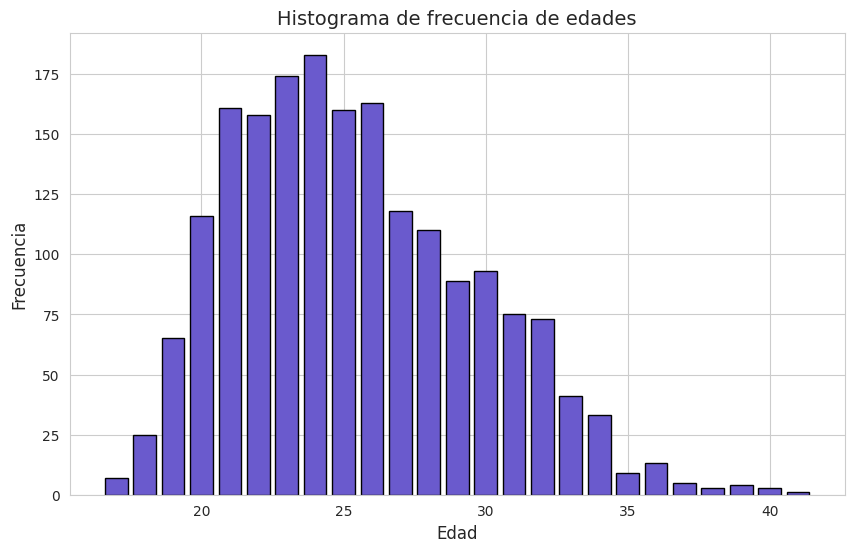

In [ ]:
# Conteo de la frecuencia de cada edad
edad_frecuencia = data['edad'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(edad_frecuencia.index, edad_frecuencia.values, color='slateblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Histograma de frecuencia de edades', fontsize = 14)
plt.xlabel('Edad', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)

# Gráfico
plt.show()

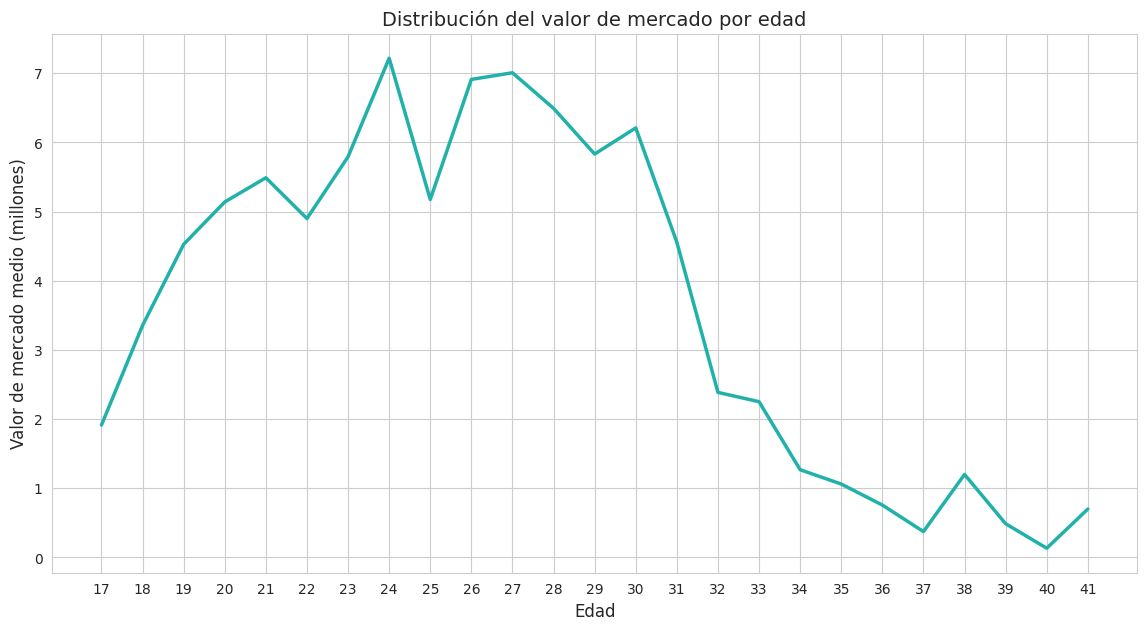

In [ ]:
# Estilo del gráfico
sns.set_style("whitegrid")

# Creación de gráfico de líneas para el valor actual medio por edad
lineplot_data = data.groupby('edad')['valor_mercado'].mean().reset_index()
plt.figure(figsize=(14,7))
lineplot = sns.lineplot(data=lineplot_data, x='edad', y='valor_mercado', color='lightseagreen', linewidth=2.5)
lineplot.set_title('Distribución del valor de mercado por edad', fontsize=14)
lineplot.set_xlabel('Edad', fontsize=12)
lineplot.set_ylabel('Valor de mercado medio (millones)', fontsize=12)
plt.xticks(np.arange(min(lineplot_data['edad']), max(lineplot_data['edad'])+1, 1.0))
plt.show()

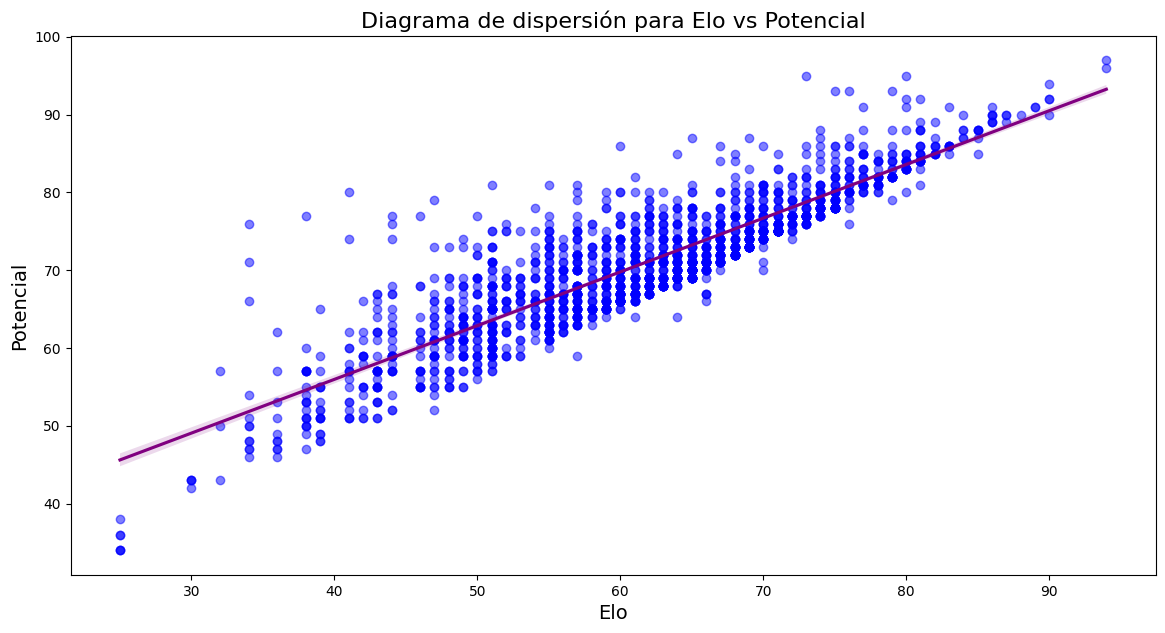

In [ ]:
# Diagrama de dispersión con linea de tendencia para 'Elo' vs 'potencial'
scatter_data = data[['Elo', 'potencial']]

plt.figure(figsize=(14,7))
scatterplot = sns.regplot(data=scatter_data, x='Elo', y='potencial', scatter_kws={'alpha':0.5, 'color': '#0000FF'},
                          line_kws={'color': '#800080'})
scatterplot.set_title('Diagrama de dispersión para Elo vs Potencial', fontsize = 16)
scatterplot.set_xlabel('Elo', fontsize = 14)
scatterplot.set_ylabel('Potencial', fontsize = 14)
plt.show()

<ipython-input-49-d1c2d7b9b286>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette)
<ipython-input-49-d1c2d7b9b286>:4: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x=x, y=y, palette=palette)


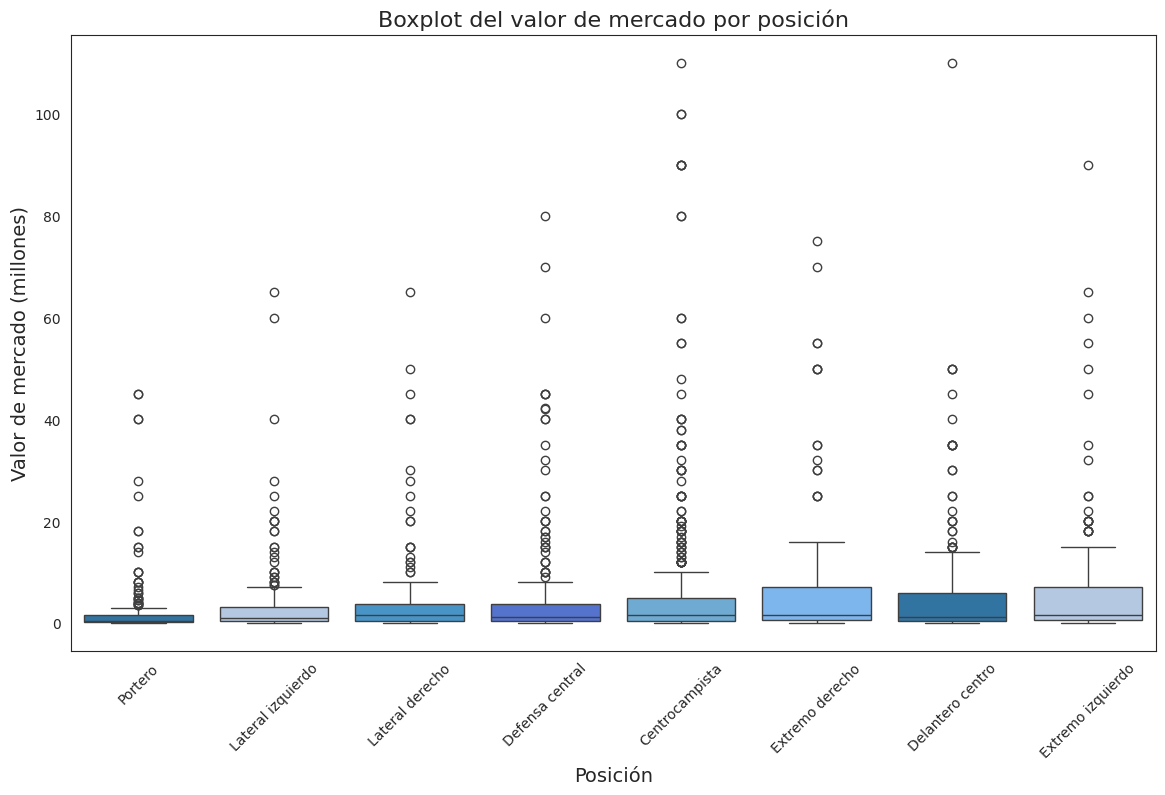

In [ ]:
# Creación de una función para generar boxplots
def plot_boxplot(df, x, y, title, palette):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x=x, y=y, palette=palette)
    plt.title('Boxplot del valor de mercado por posición', fontsize = 16)
    plt.xlabel('Posición', fontsize = 14)
    plt.ylabel('Valor de mercado (millones)', fontsize = 14)
    plt.xticks(rotation=45)
    plt.show()

# Paleta de colores en tonos de azul
blue_palette = ["#1f77b4", "#aec7e8", "#3498db", "#4169e1", "#5dade2", "#6bb5ff"]

# Boxplot del valor de mercado por posición con paleta de azules
plot_boxplot(data, 'posicion', 'valor_mercado', 'Valor de mercado por posición', blue_palette)

<ipython-input-47-492aeed6af6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


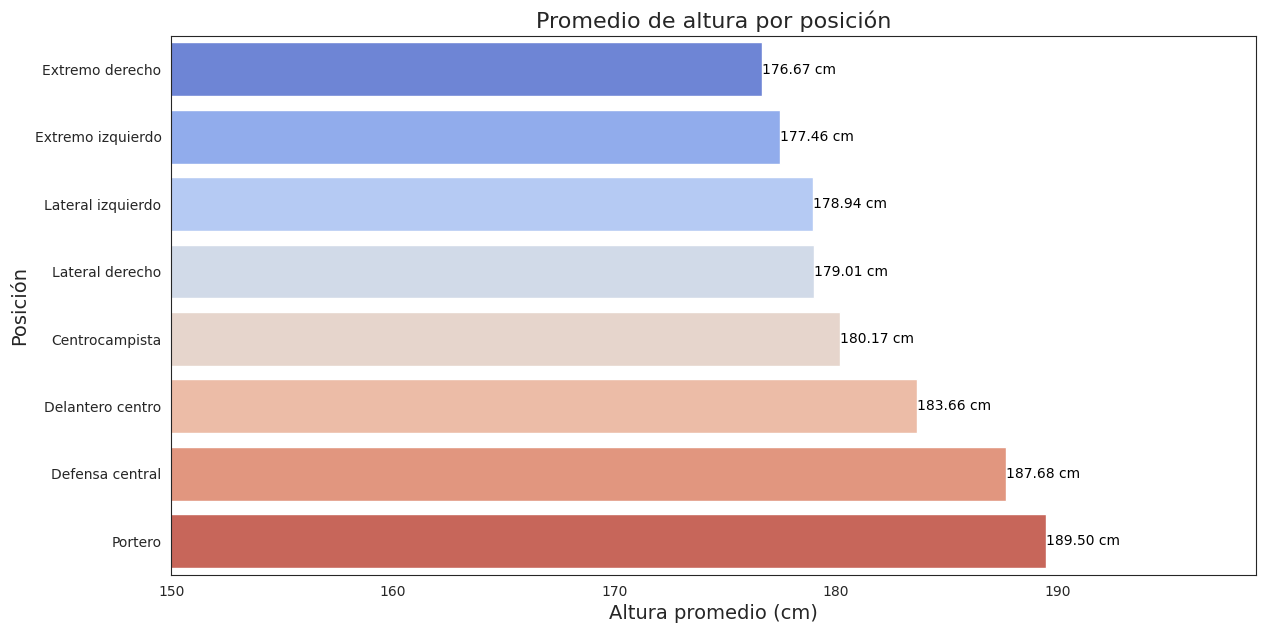

In [ ]:
# Cálculo de la altura promedio por posición
altura_promedio_por_posicion = data.groupby('posicion', as_index=False)['altura'].mean().sort_values(by='altura')

# Creación del gráfico de Altura Promedio por Posición
plt.figure(figsize=(14, 7))
sns.set_style("white")
barplot = sns.barplot(
    x='altura',
    y='posicion',
    data=altura_promedio_por_posicion,
    palette='coolwarm',
    order=altura_promedio_por_posicion['posicion'])

# Texto con el promedio de altura en cada barra
for index, value in enumerate(altura_promedio_por_posicion['altura']):
    plt.text(value, index, f'{value:.2f} cm', color='black', va="center")

plt.title('Promedio de altura por posición', fontsize = 16)
plt.xlabel('Altura promedio (cm)', fontsize = 14)
plt.ylabel('Posición', fontsize = 14)

# Establecimiento del límite inferior del eje x en 150 cm
plt.xlim(150, barplot.get_xlim()[1])

# Gráfico
plt.show()

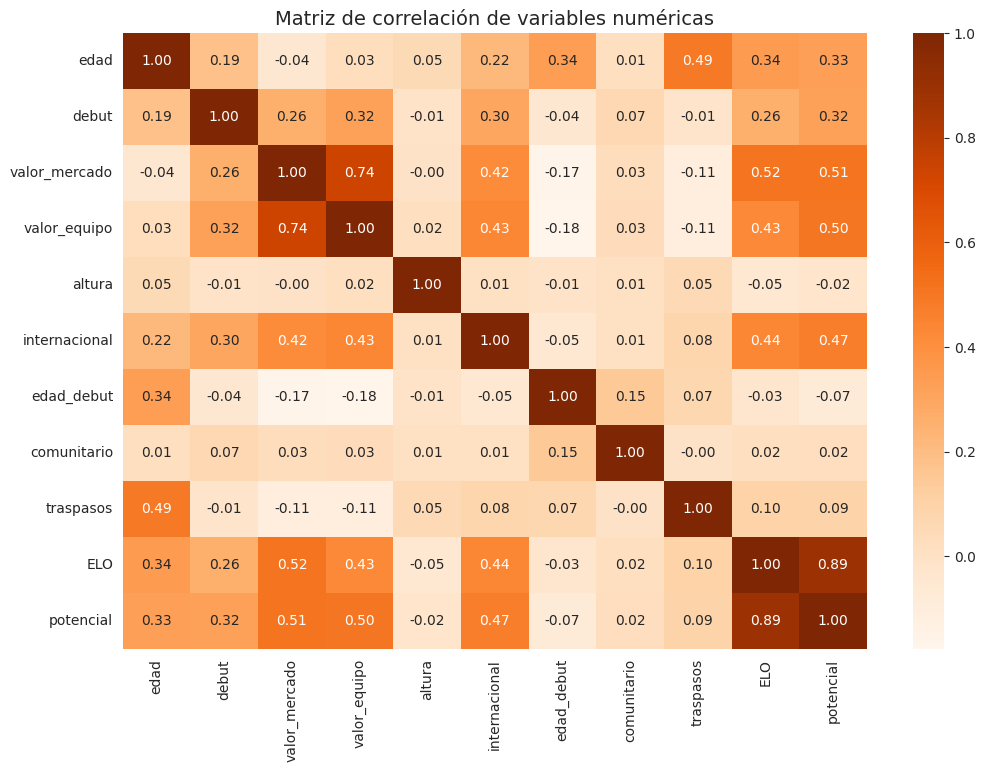

In [ ]:
# Selección de las columnas numéricas para el análisis de correlación
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Cálculo de la matriz de correlación
correlation_matrix = numerical_data.corr()

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Matriz de correlación de variables numéricas", fontsize = 14)
plt.show()

<ipython-input-12-9d7902339a5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='posicion', y='edad', data=data, palette="coolwarm")


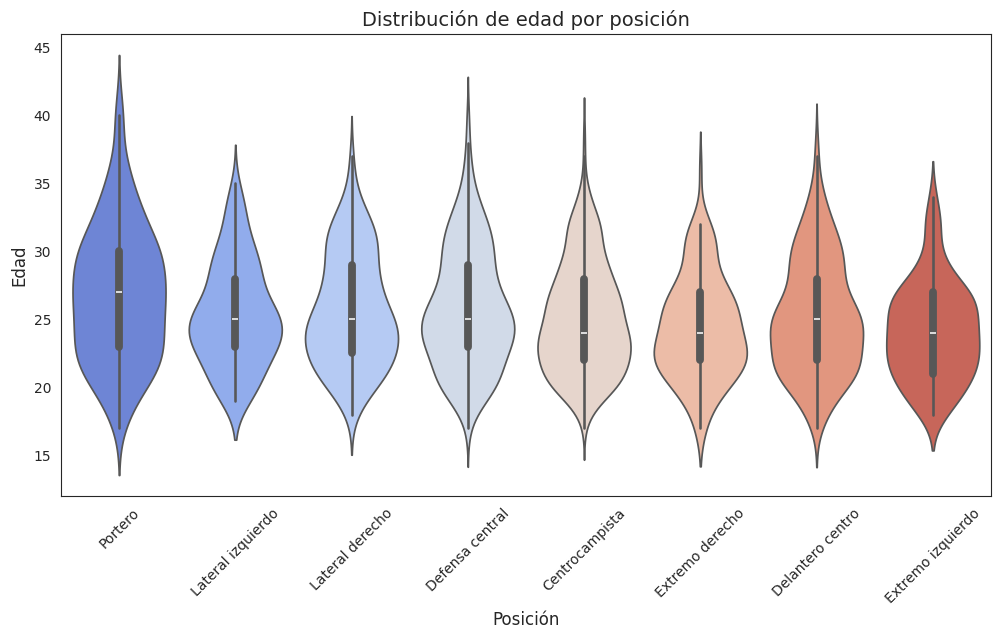

In [ ]:
# Gráfico de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x='posicion', y='edad', data=data, palette="coolwarm")
plt.title('Distribución de edad por posición', fontsize = 14)
plt.xlabel('Posición', fontsize = 12)
plt.ylabel('Edad', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

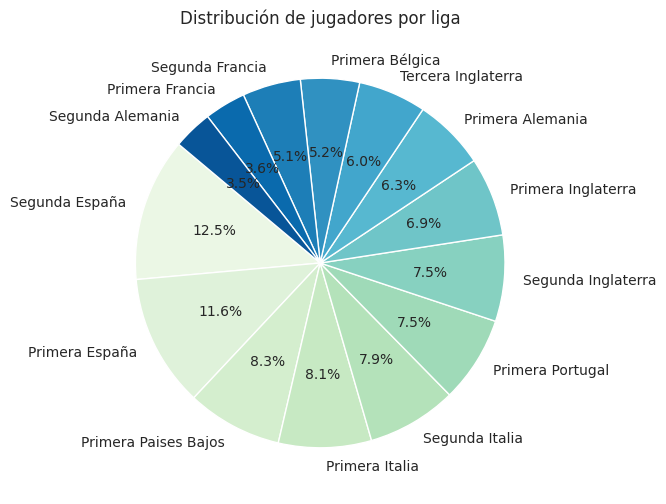

In [ ]:
# Recuento del número de jugadores en cada liga
liga_counts = data['liga'].value_counts()

# Paleta de colores GnBu para el gráfico
palette = sns.color_palette("GnBu", len(liga_counts))

# Gráfico de tarta con la paleta especificada
plt.figure(figsize=(10, 6))
plt.pie(liga_counts, labels=liga_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribución de jugadores por liga')
plt.show()

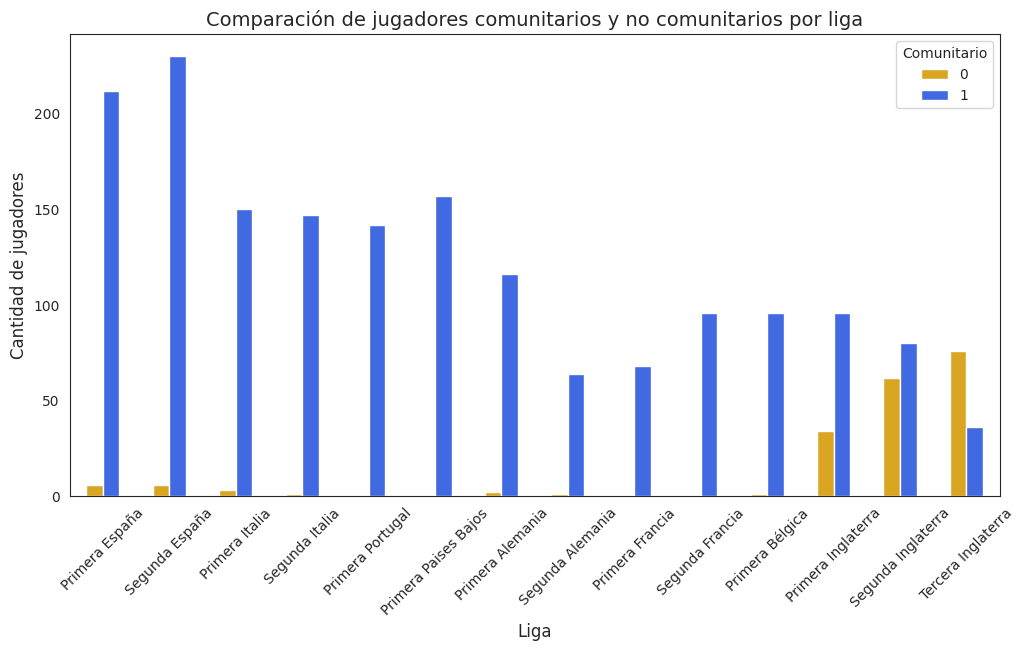

In [ ]:
# DataFrame ordenado por la columna 'liga'
data_sorted = data.sort_values('liga')

# Agrupación los datos ordenados
data_grouped = data_sorted.groupby('liga')['comunitario'].value_counts().unstack().fillna(0)

# Ajuste del orden según preferencias
order = ['Primera España', 'Segunda España', 'Primera Italia', 'Segunda Italia', 'Primera Portugal', 'Primera Paises Bajos',
         'Primera Alemania','Segunda Alemania','Primera Francia', 'Segunda Francia','Primera Bélgica',
         'Primera Inglaterra', 'Segunda Inglaterra','Tercera Inglaterra']
data_grouped = data_grouped.reindex(order)

# Creación del gráfico de barras agrupadas
colores = ['goldenrod', 'royalblue']
data_grouped.plot(kind='bar', color=colores, figsize=(12, 6))

# Detalles al gráfico
plt.title('Comparación de jugadores comunitarios y no comunitarios por liga', fontsize = 14)
plt.xlabel('Liga', fontsize = 12)
plt.ylabel('Cantidad de jugadores', fontsize = 12)
plt.xticks(rotation=45)
plt.legend(title='Comunitario', loc='upper right')

# Gráfico
plt.show()

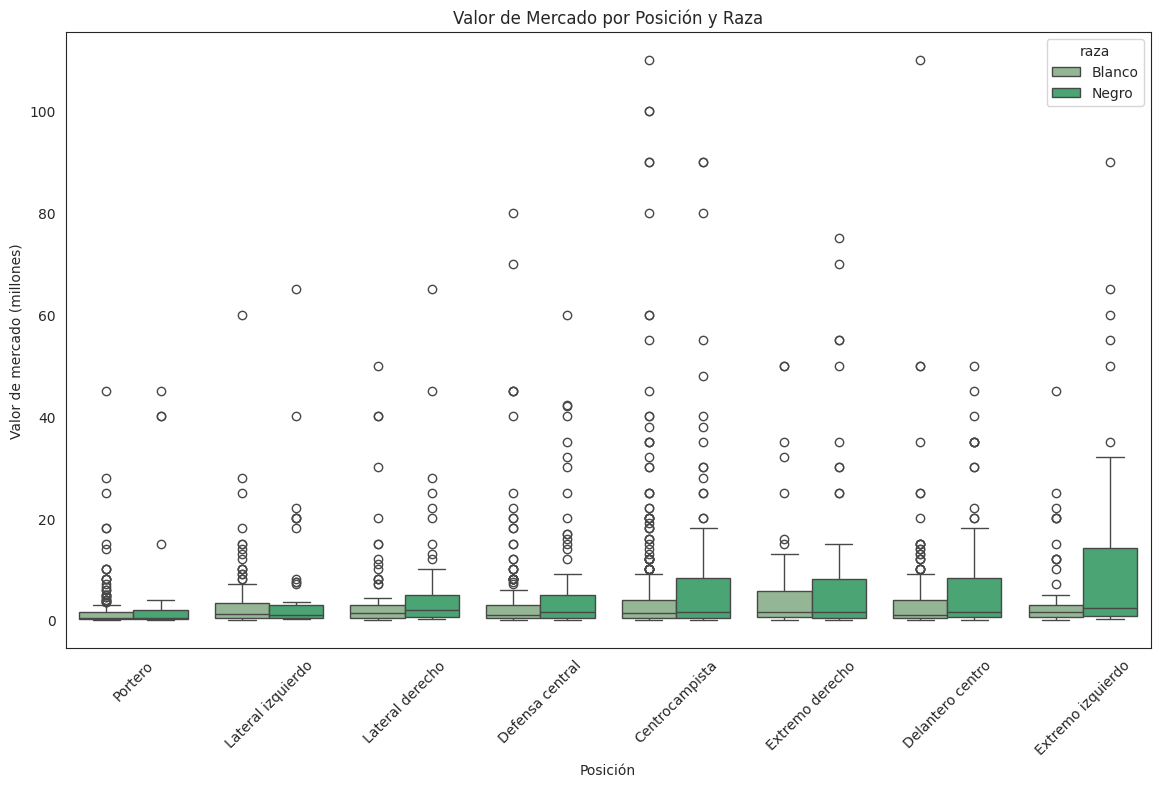

In [ ]:
# Gráfico de caja comparando el valor actual según la posición y raza
paleta_colores = ["darkseagreen", "mediumseagreen"]

plt.figure(figsize=(14, 8))
sns.boxplot(x='posicion', y='valor_mercado', hue='raza', data=data, palette=paleta_colores)
plt.title('Valor de Mercado por Posición y Raza')
plt.xlabel('Posición')
plt.ylabel('Valor de mercado (millones)')
plt.xticks(rotation=45)
plt.show()

# **MODELOS** **ANALÍTICOS**

MODELO 1: K MEANS

In [ ]:
# Conteo de jugadores por cantera
cantera_counts = data['cantera'].value_counts().reset_index()
cantera_counts.columns = ['cantera', 'numero_jugadores']

# Primeros registros del conteo
cantera_counts.head()

,cantera,numero_jugadores
0,FC Barcelona,103
1,Real Madrid,86
2,Chelsea,75
3,Manchester City,75
4,PSG,74


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

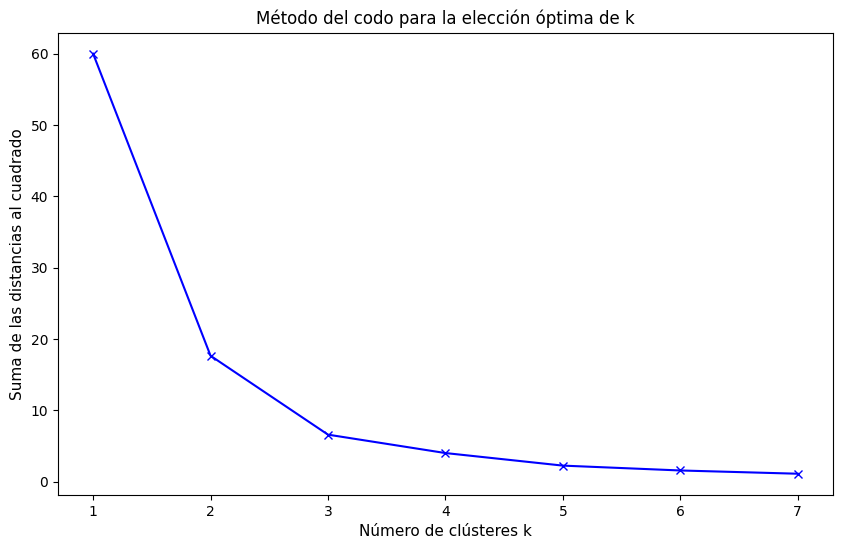

In [ ]:
# Normalización de los datos
scaler = StandardScaler()
cantera_counts_scaled = scaler.fit_transform(cantera_counts[['numero_jugadores']])

# Cálculo de la suma de las distancias al cuadrado para diferentes valores de k
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(cantera_counts_scaled)
    distortions.append(kmeanModel.inertia_)

# Gráfico del Método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústeres k', fontsize = 11)
plt.ylabel('Suma de las distancias al cuadrado', fontsize = 11)
plt.title('Método del codo para la elección óptima de k', fontsize = 12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


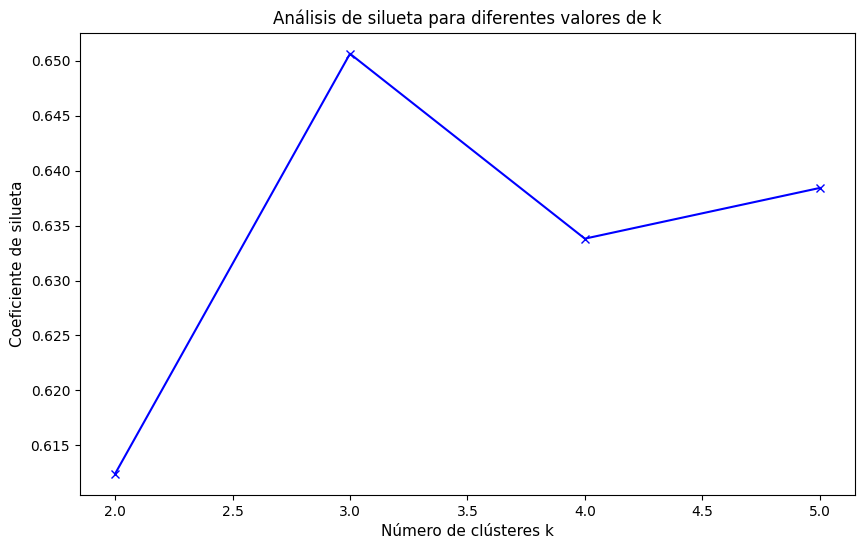

In [ ]:
# Cálculo del coeficiente de silueta para diferentes valores de k
silhouette_scores = []
K = range(2, 6)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeanModel.fit_predict(cantera_counts_scaled)
    silhouette_avg = silhouette_score(cantera_counts_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Gráfico de análisis de silueta
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clústeres k', fontsize = 11)
plt.ylabel('Coeficiente de silueta', fontsize = 11)
plt.title('Análisis de silueta para diferentes valores de k', fontsize = 12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2 El promedio silhouette_score es : 0.6124198336688735


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3 El promedio silhouette_score es : 0.650644751137167
Para n_clusters = 4 El promedio silhouette_score es : 0.6338139562892938


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 5 El promedio silhouette_score es : 0.6384264888551965


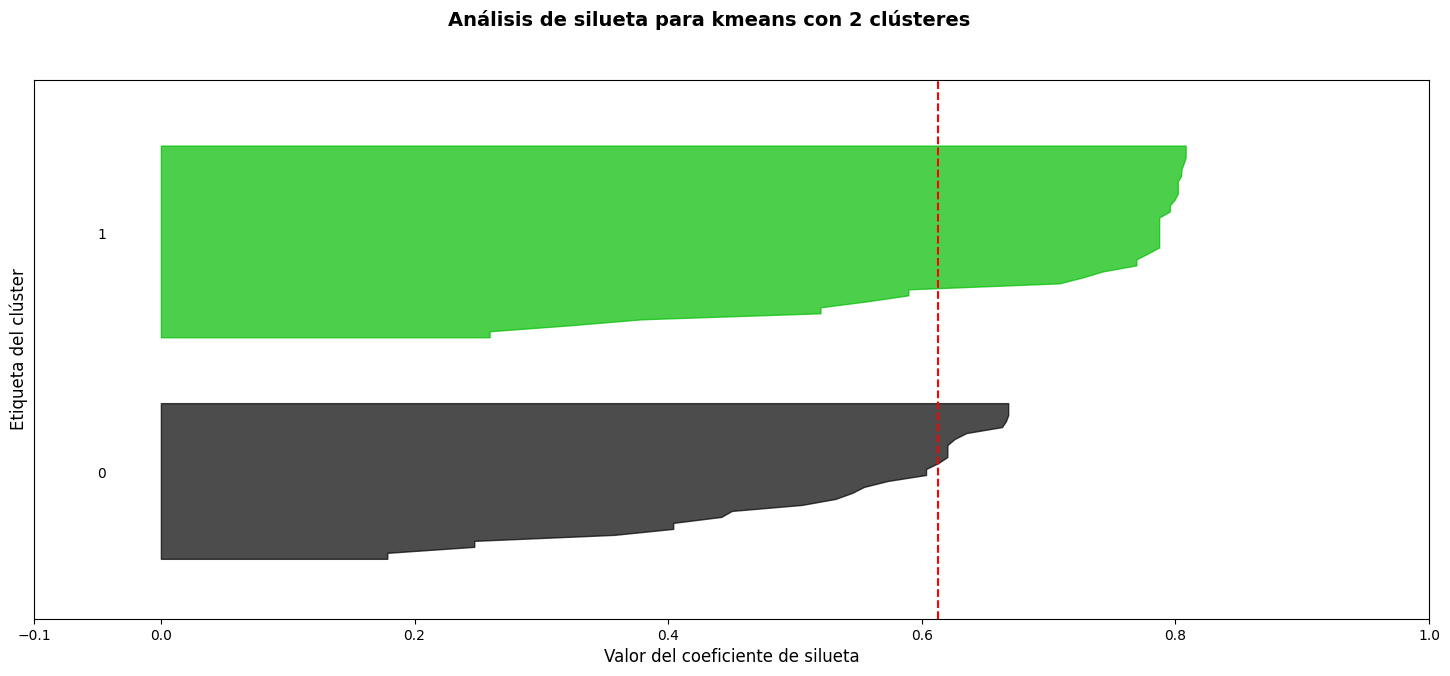

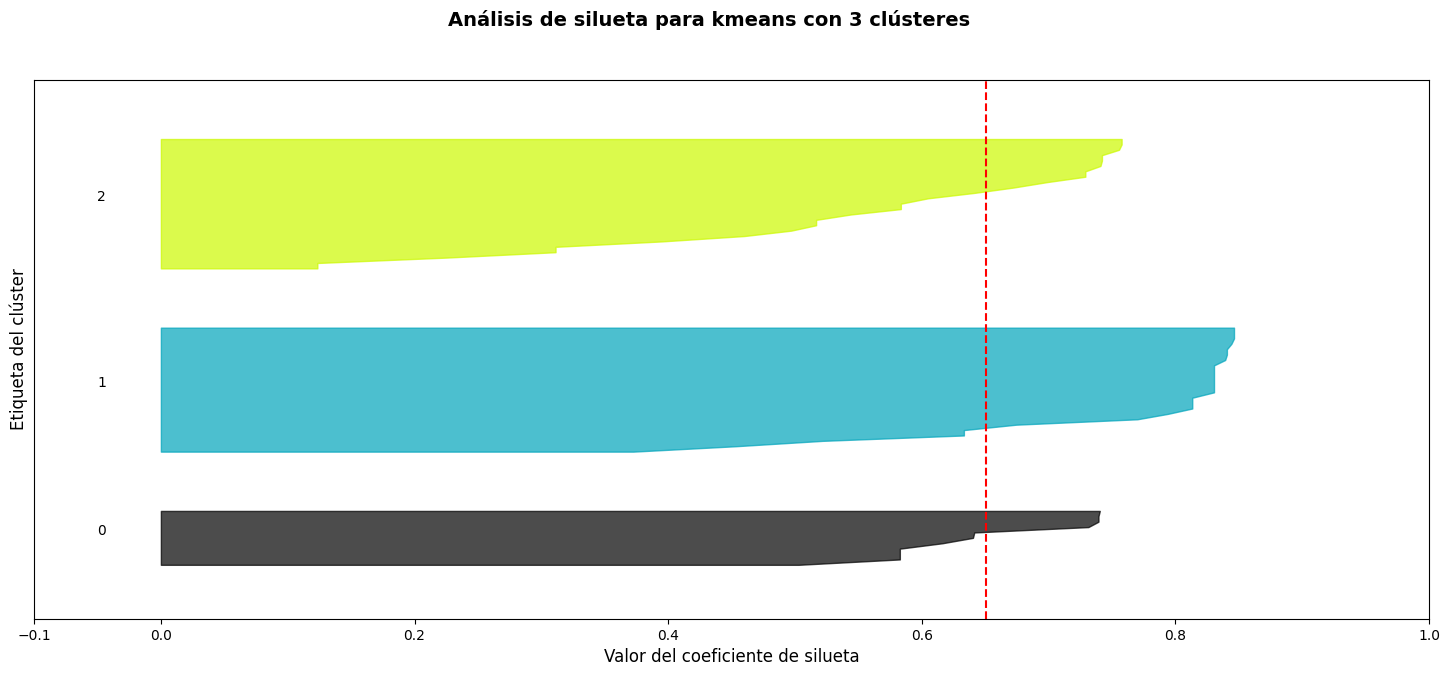

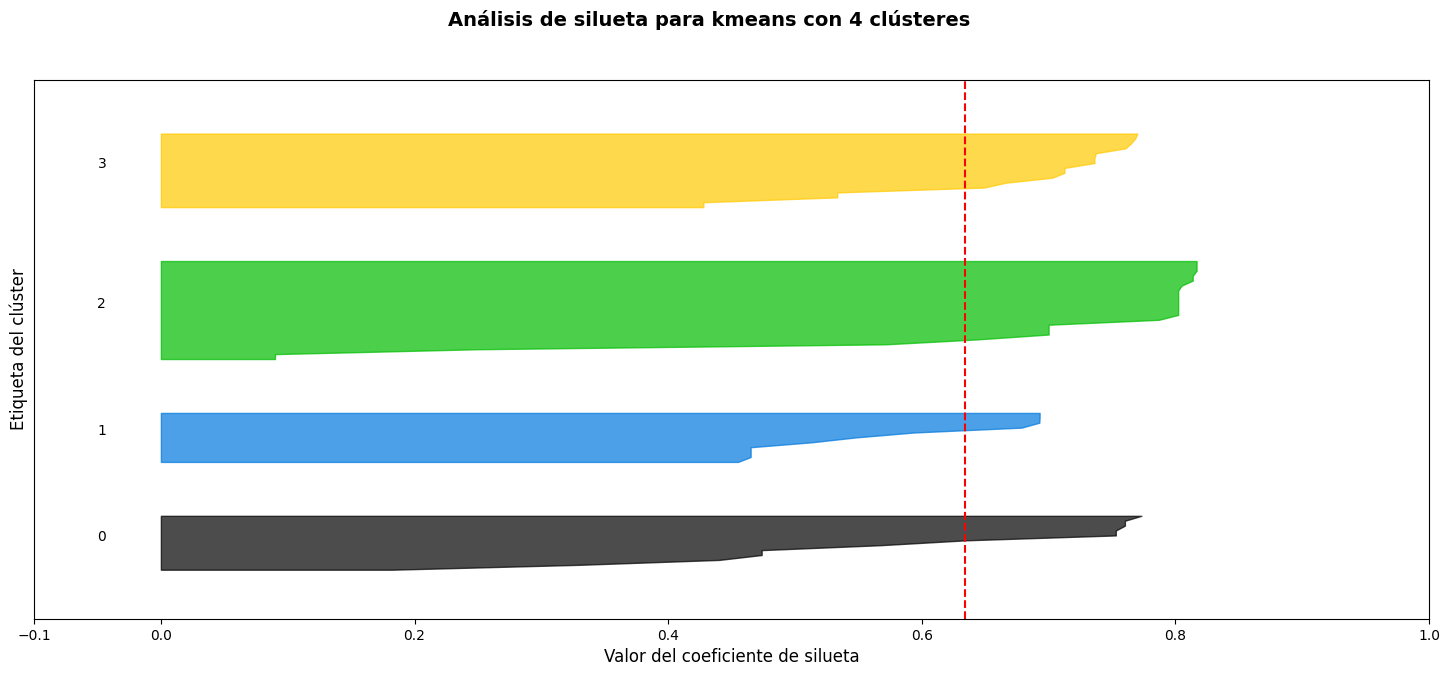

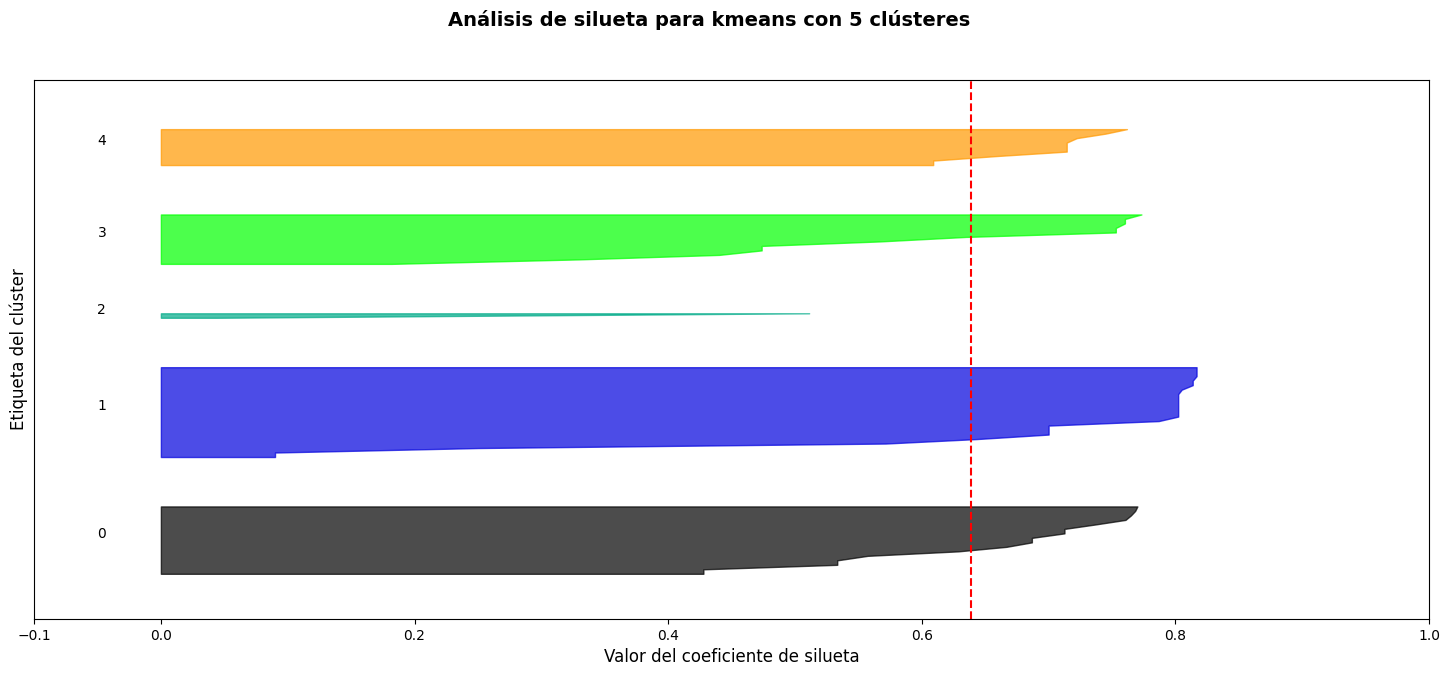

In [ ]:
# Número de clusters a probar
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Subplot con 1 fila y 1 columna
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # El coeficiente de silueta puede variar entre -1 y 1
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(cantera_counts_scaled) + (n_clusters + 1) * 10])

    # Inicialización del clusterer con el número de clusters y un generador de números aleatorios
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cantera_counts_scaled)

    # Coeficiente de silueta promedio para todos los samples
    silhouette_avg = silhouette_score(cantera_counts_scaled, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio silhouette_score es :", silhouette_avg)

    # Cálculo del coeficiente de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(cantera_counts_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregación de coeficientes de silueta para las muestras pertenecientes al cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetas de los gráficos de silueta con el número del cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Cálculo del nuevo y_lower para el siguiente gráfico
        y_lower = y_upper + 10

    ax1.set_xlabel("Valor del coeficiente de silueta", fontsize = 12)
    ax1.set_ylabel("Etiqueta del clúster", fontsize = 12)

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Análisis de silueta para kmeans "
                  "con %d clústeres" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Para k=2: El promedio del coeficiente de silueta es de 0.6124. Este es un valor relativamente alto que indica una buena separación y cohesión, pero vamos a compararlo con el resto de las opciones para ver si hay una mejor.

Para k=3: El promedio del coeficiente de silueta aumenta a 0.6506, lo que indica una mejora en la definición y separación de los clusters en comparación con k=2.

Para k=4: El valor disminuye ligeramente a 0.6338, lo que sugiere que, aunque la separación sigue siendo buena, no es tan óptima como con k=3.

Para k=5: El valor es de 0.6384, que, aunque es más alto que para k=4, sigue siendo inferior al alcanzado para k=3.

El valor más alto del coeficiente de silueta se obtiene con k=3 (0.6506), lo que indica que esta configuración logra el mejor equilibrio entre la cohesión interna de los clusters y la separación entre ellos. Esto significa que los puntos dentro de cada cluster están más cerca entre sí (alta cohesión) y más lejos de los puntos de otros clusters (alta separación), en comparación con las otras configuraciones evaluadas.

Tomando en cuenta tanto el Método del Codo como el Análisis de Silueta, parece que k=3 es una buena elección para este conjunto de datos. Proporciona un balance entre minimizar la suma de las distancias al cuadrado dentro de los clusters y maximizar la separación entre los clusters, lo cual es consistente con tu objetivo de clasificar las canteras en tres grupos: top, medias y pequeñas.

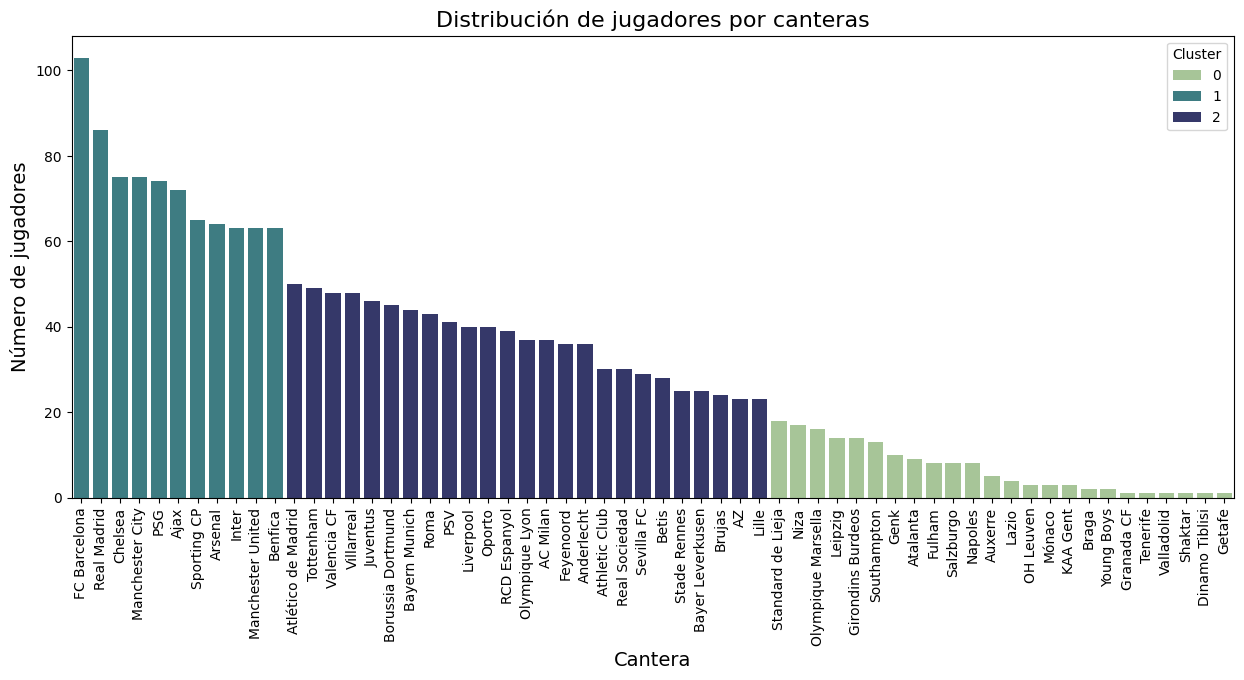

In [ ]:
# Aplicación de k-means con k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(cantera_counts[['numero_jugadores']])

# Asignación de los clusters a cada cantera
cantera_counts['cluster'] = kmeans.labels_

# Gráfico de barras para visualizar los clústeres
plt.figure(figsize=(15, 6))
sns.barplot(data=cantera_counts, x='cantera', y='numero_jugadores', hue='cluster', palette='crest')
plt.xticks(rotation=90)
plt.title('Distribución de jugadores por canteras', fontsize = 16)
plt.xlabel('Cantera', fontsize = 14)
plt.ylabel('Número de jugadores', fontsize = 14)
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Cálculo de los centroides de los clústeres
cluster_centroids = kmeans.cluster_centers_

# Transformación de los centroides de los clústeres a la escala original
cluster_centroids_original = scaler.inverse_transform(cluster_centroids)

# DataFrame para mostrar los centroides de los clústeres
cluster_centroids_df = pd.DataFrame(cluster_centroids_original, columns=['centroides'])
cluster_centroids_df['clúster'] = cluster_centroids_df.index

# Centroides de los clústeres
cluster_centroids_df

,centroides,clúster
0,203.344607,0
1,1879.865755,1
2,959.161277,2


Cluster 0 (Canteras Pequeñas): Este cluster incluye canteras que aportan un número relativamente pequeño de jugadores al fútbol profesional. Estas canteras podrían centrarse en regiones o mercados específicos, o quizás no tienen el mismo nivel de recursos o reconocimiento que las canteras más grandes.

Cluster 1 (Canteras Top): Las canteras en este grupo se distinguen por tener un alto número de jugadores en el fútbol profesional. Son canteras de renombre y alta producción, probablemente con fuertes programas de desarrollo juvenil y una amplia red de scouting. Clubes como Manchester United, Ajax e Inter, que se encuentran en este grupo, son conocidos por su excelencia en el desarrollo de talentos.

Cluster 2 (Canteras Medianas): Este grupo se sitúa entre los extremos, con un número moderado de jugadores en el fútbol profesional. Estas canteras pueden tener buenos programas de desarrollo pero quizás no al mismo nivel de las canteras top. Aún así, su contribución al fútbol profesional es significativa.

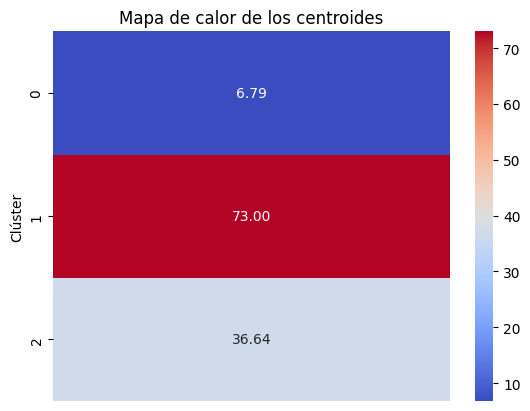

In [ ]:
# Mapa de calor
sns.heatmap(cluster_centroids, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de los centroides')
plt.xticks([])
plt.ylabel('Clúster')
plt.show()

MODELO 2: ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

In [ ]:
# Selección variables numéricas relevantes para el análisis, excluyendo la variable objetivo 'valor_mercado'
features = ['edad', 'debut', 'valor_equipo', 'altura', 'internacional', 'edad_debut', 'comunitario', 'traspasos', 'Elo', 'potencial']
y = data['valor_mercado']

# Estandarización de las varibales seleccionadas
X = data[features]
scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)

Se estandarizan las variables numéricas relevantes para el análisis, excluyendo la variable objetivo valor_mercado. Esto es necesario porque el PCA es afectado por la escala de las variables, y queremos asegurarnos de que cada variable contribuya equitativamente al análisis.

In [ ]:
# Aplicación de PCA
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

Aplicamos PCA para reducir la dimensionalidad de los datos. El objetivo es simplificar la complejidad de los datos manteniendo tanto como sea posible de la información original.

In [ ]:
# Varianza explicada por cada componente y la varianza acumulada
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Representación en formato tabla
variance_df = pd.DataFrame({'Componente': range(1, len(features) + 1), 'Varianza Explicada(%)': explained_variance_ratio*100, 'Varianza Acumulada(%)': explained_variance_ratio_cumulative*100})
print(variance_df)

   Componente  Varianza Explicada(%)  Varianza Acumulada(%)
0           1              29.725103              29.725103
1           2              16.468213              46.193316
2           3              11.037425              57.230741
3           4              10.160003              67.390744
4           5               8.279850              75.670594
5           6               8.167391              83.837985
6           7               6.498018              90.336003
7           8               5.052191              95.388194
8           9               3.561300              98.949493
9          10               1.050507             100.000000


El primer componente explica aproximadamente el 29.75% de la varianza total de los datos. Esto indica que casi un tercio de la información en el conjunto de datos puede ser representada por este único componente.
El segundo componente añade otro 16.47% a la varianza explicada, llevando la varianza acumulada al 46.19%. Esto significa que juntos, los dos primeros componentes capturan casi la mitad de toda la variabilidad en los datos.

A medida que agregamos más componentes, la varianza acumulada aumenta, pero cada componente adicional contribuye menos a la varianza explicada que el anterior. Por ejemplo, el tercer componente añade un 11.04% adicional, mientras que el décimo componente solo añade un 1.05%.

Podemos reducir la dimensionalidad de los datos de diez dimensiones originales a seis, conservando más del 80% de la información original, lo que cumple con el criterio de selección basado en un umbral del 80%.

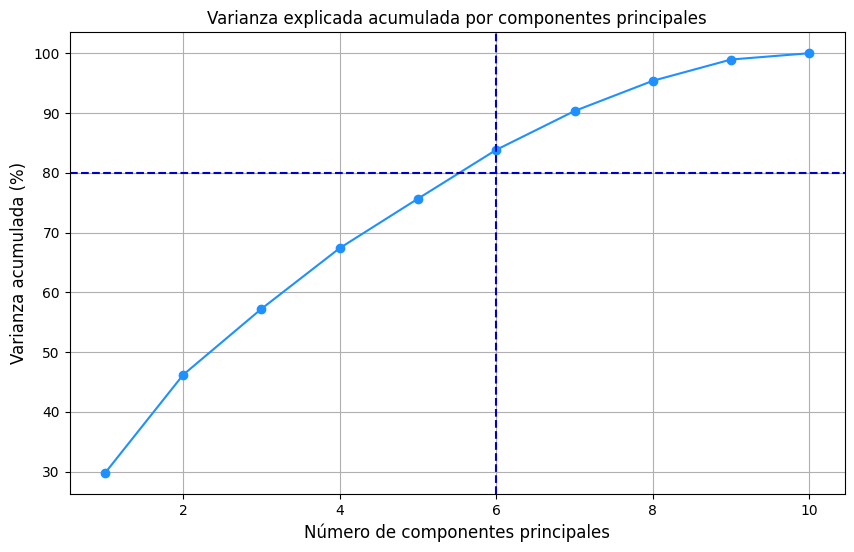

In [ ]:
# Visualización de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(variance_df['Componente'], variance_df['Varianza Acumulada(%)'], marker='o', linestyle='-', color='dodgerblue')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales', fontsize = 12)
plt.ylabel('Varianza acumulada (%)', fontsize = 12)
plt.axhline(y=80, color='mediumblue', linestyle='--')
plt.axvline(x=6, color='mediumblue', linestyle='--')
plt.grid(True)
plt.show()

El gráfico de la varianza acumulada indica que para representar al menos un 80% de la varianza de los datos debemos elegir 6 componentes principales. Esto se puede observar claramente en el gráfico, donde la línea de varianza acumulada cruza el umbral del 80% justo antes de añadir el séptimo componente. La línea verde vertical que marca el número de componentes necesarios para superar el umbral del 80% de varianza explicada se sitúa en 6 componentes.

Elegir 6 componentes principales nos permite reducir la dimensionalidad de los datos mientras conservamos la mayor parte de la información original, lo que es útil para simplificar los análisis subsiguientes y facilitar la visualización de los datos sin perder características esenciales.

In [ ]:
# Aplicación de PCA con 6 componentes
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

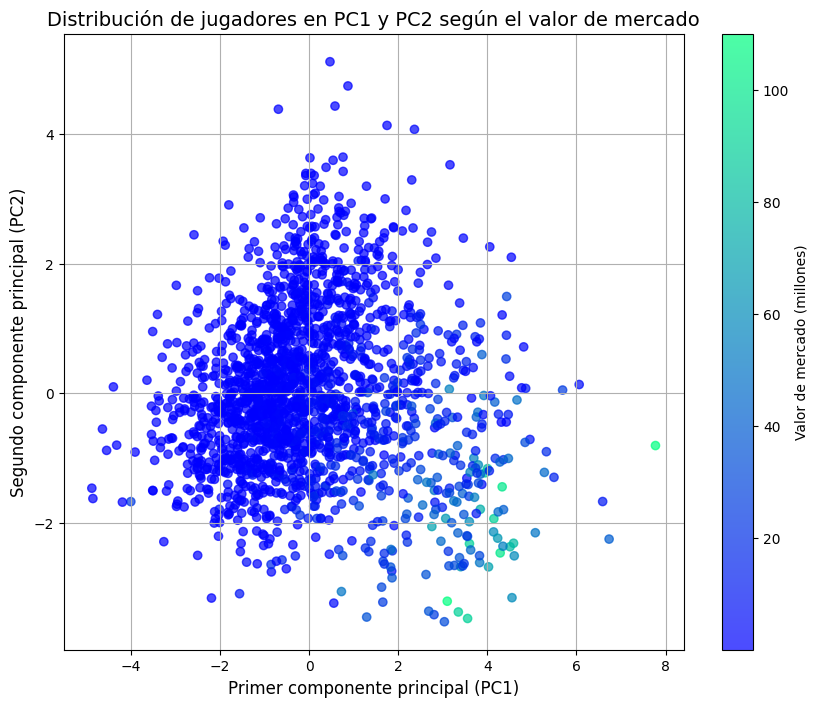

In [ ]:
# Visualización de los datos en los dos primeros componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['valor_mercado'], cmap='winter', alpha=0.7)
plt.colorbar(label='Valor de mercado (millones)')
plt.xlabel('Primer componente principal (PC1)',fontsize = 12)
plt.ylabel('Segundo componente principal (PC2)', fontsize = 12)
plt.title('Distribución de jugadores en PC1 y PC2 según el valor de mercado', fontsize = 14)
plt.grid(True)
plt.show()

La visualización de las observaciones en el espacio definido por los dos primeros componentes principales muestra una dispersión de puntos donde el color representa el valor de mercado de los jugadores. Esta visualización ayuda a identificar posibles patrones o agrupaciones en función de los componentes principales y su relación con el valor de mercado.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


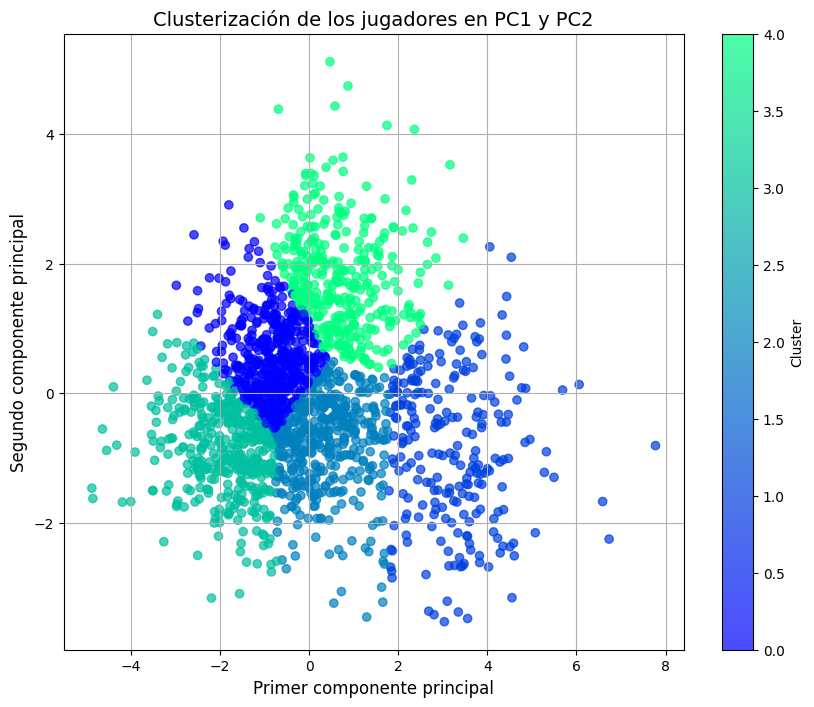

In [ ]:
# Aplicación de kmeans para clusterizar los datos en los dos primeros componentes principales
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :2])

# Visualización de los clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='winter', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Primer componente principal', fontsize=12)
plt.ylabel('Segundo componente principal',fontsize=12)
plt.title('Clusterización de los jugadores en PC1 y PC2', fontsize=14)
plt.grid(True)
plt.show()

Los clusters están distribuidos de forma distintiva a lo largo de los ejes PC1 y PC2. Esto indica que el algoritmo de K-Means ha encontrado patrones coherentes en los datos que podrían corresponder a diferencias significativas en las características de los jugadores.

Si recordamos las cargas de las variables en PC1 y PC2, podríamos interpretar que los clusters podrían estar separando a los jugadores por aspectos de calidad y potencial (PC1) y por experiencia y carrera (PC2).

In [ ]:
from sklearn.linear_model import LinearRegression

# División de los datos en conjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicciones del conjunto de prueba
y_pred = reg_model.predict(X_test)

In [ ]:
# Cálculo del MSE y el R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(55.36335834702809, 0.5207565082274912)

El MSE es de aproximadamente 55.36, que es el promedio de los cuadrados de los errores entre los valores predichos por el modelo y los valores reales. Un MSE de 55.36 sugiere que las predicciones del modelo se desvían en promedio de los valores reales en una magnitud de 55.36.

El valor de R² es aproximadamente 0.52, lo que indica que alrededor del 52% de la variabilidad de la variable de respuesta (el valor de mercado, en este caso) puede ser explicada por el modelo. Un R² de 0.52 puede considerarse moderado, implicando que aunque el modelo captura una parte significativa de la variabilidad, todavía hay un 48% que podría estar siendo influenciado por otros factores no incluidos en el modelo.

In [ ]:
# Coeficientes del modelo ajustados a los 6 componentes de PCA
coefficients = pd.DataFrame({'Componente': range(1, 7), 'Coeficiente': reg_model.coef_})

coefficients

,Componente,Coeficiente
0,1,4.282757
1,2,-3.505713
2,3,-0.637478
3,4,0.766488
4,5,-0.894887
5,6,-0.635008


<ipython-input-20-a1582b37fe68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Componente', y='Coeficiente', data=coefficients, palette='PuRd')


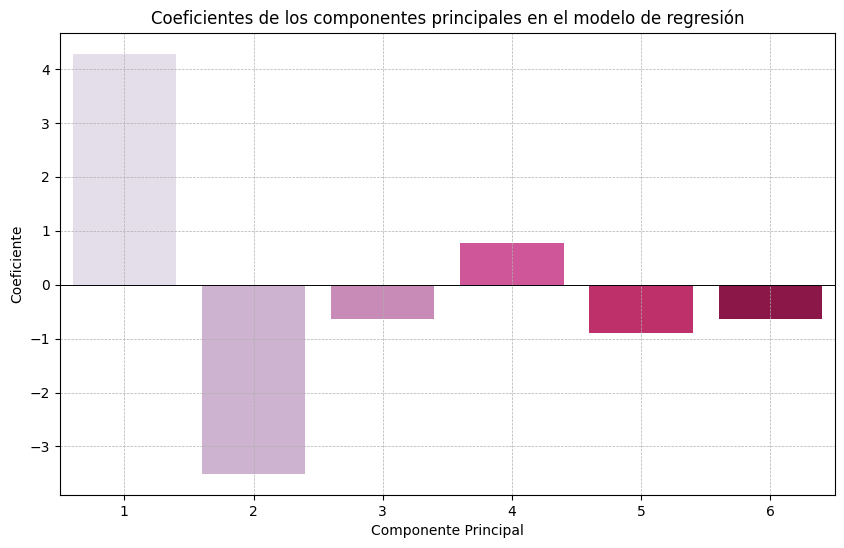

In [ ]:
# Visualización de los coeficientes del modelo de regresión
plt.figure(figsize=(10, 6))
sns.barplot(x='Componente', y='Coeficiente', data=coefficients, palette='PuRd')
plt.title('Coeficientes de los componentes principales en el modelo de regresión')
plt.xlabel('Componente Principal')
plt.ylabel('Coeficiente')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.7)
plt.show()

 El primer componente tiene un coeficiente muy alto de aproximadamente 4.28, lo que implica que es el más influyente en la predicción del valor de mercado. El segundo componente tiene un efecto inverso significativo, con un coeficiente de aproximadamente -3.50. Los otros componentes tienen coeficientes más pequeños y varían entre positivos y negativos, indicando influencias más moderadas sobre la variable de respuesta.

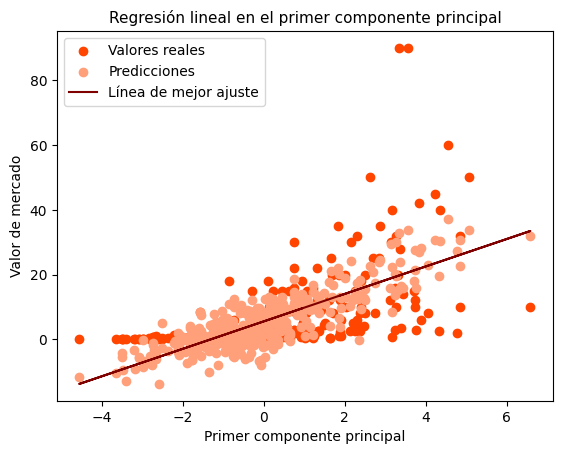

In [ ]:
# Gráfica con puntos de datos
plt.scatter(X_test[:, 0], y_test, color='orangered', label='Valores reales')
plt.scatter(X_test[:, 0], y_pred, color='lightsalmon', label='Predicciones')

# Cálculo de la línea de mejor ajuste
coef = np.polyfit(X_test[:,0], y_pred, 1)
poly1d_fn = np.poly1d(coef)

# Dibujo de la línea de mejor ajuste
plt.plot(X_test[:,0], poly1d_fn(X_test[:,0]), color='maroon', label='Línea de mejor ajuste')

# Etiquetas y título
plt.xlabel('Primer componente principal', fontsize=10)
plt.ylabel('Valor de mercado', fontsize=10)
plt.title('Regresión lineal en el primer componente principal', fontsize=11)
plt.legend()
plt.show()


El gráfico presenta los resultados de una regresión lineal aplicada sobre el primer componente principal, reflejando una correlación positiva entre este componente y el valor de mercado. La línea de mejor ajuste muestra que, en general, a medida que aumenta el valor del primer componente principal, también lo hace el valor de mercado, lo cual sugiere que el primer componente es un buen predictor del valor de mercado.

In [ ]:
# Cargas de las variables para los componentes principales
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(6)],
                        index=features)

# Cargas de los 6 primeros componentes
print(loadings)

                    PC1       PC2       PC3       PC4       PC5       PC6
edad           0.276625  0.577010  0.075844 -0.020149  0.129009 -0.005768
debut          0.300412 -0.090703 -0.218046  0.115069  0.745737  0.316391
valor_equipo   0.377873 -0.329794 -0.071607  0.129492  0.022242 -0.013329
altura        -0.002250  0.079438  0.159045  0.937802 -0.052804 -0.259698
internacional  0.399383 -0.077862  0.011590  0.075939  0.133436  0.036485
edad_debut    -0.022512  0.485909 -0.448776 -0.098421  0.215965 -0.567504
comunitario    0.029479  0.089839 -0.766376  0.211100 -0.423319  0.410044
traspasos      0.110563  0.539614  0.352399  0.036681 -0.122566  0.521307
Elo            0.498185 -0.005974  0.040975 -0.142582 -0.312138 -0.211664
potencial      0.518790 -0.047930  0.039369 -0.091764 -0.260485 -0.155408


PC1: Este componente parece reflejar la calidad y el potencial de los jugadores, destacando su rendimiento en competiciones internacionales y su valoración de ELO, junto con su experiencia y edad, lo que sugiere que PC1 captura aspectos relacionados con la habilidad y la trayectoria profesional de los jugadores.

PC2: La edad domina este componente, indicando que podría estar capturando la madurez de los jugadores, mientras que las cargas negativas en 'comunitario' y 'valor_equipo' sugieren que también distingue entre jugadores locales y extranjeros y su relación con el valor de los equipos a los que pertenecen.

PC3: Este componente está marcado por una carga negativa en 'debut' y una carga positiva en 'traspasos', lo que indica que puede estar asociado con la reciente incorporación de jugadores al profesionalismo y su movilidad entre equipos o su demanda en el mercado de transferencias.

PC4: Con 'debut' y 'altura' teniendo las cargas más altas, PC4 parece estar relacionado con la novedad de los jugadores en el ámbito profesional y sus atributos físicos, respectivamente, lo que puede reflejar cómo estos factores influyen en la percepción de su carrera.

PC5: El alto valor de 'debut' y la carga negativa de 'edad_debut' en este componente sugieren que está relacionado con el inicio de la carrera profesional de los jugadores y la edad a la que hicieron su debut, lo que podría tener implicaciones en su desarrollo y proyección futura.

PC6: Con cargas moderadas en 'debut' y 'comunitario', y una carga negativa significativa en 'edad_debut', PC6 puede estar diferenciando entre jugadores que comenzaron jóvenes y aquellos que son vistos como talentos locales, apuntando a una mezcla de experiencia de inicio de carrera y localismo.

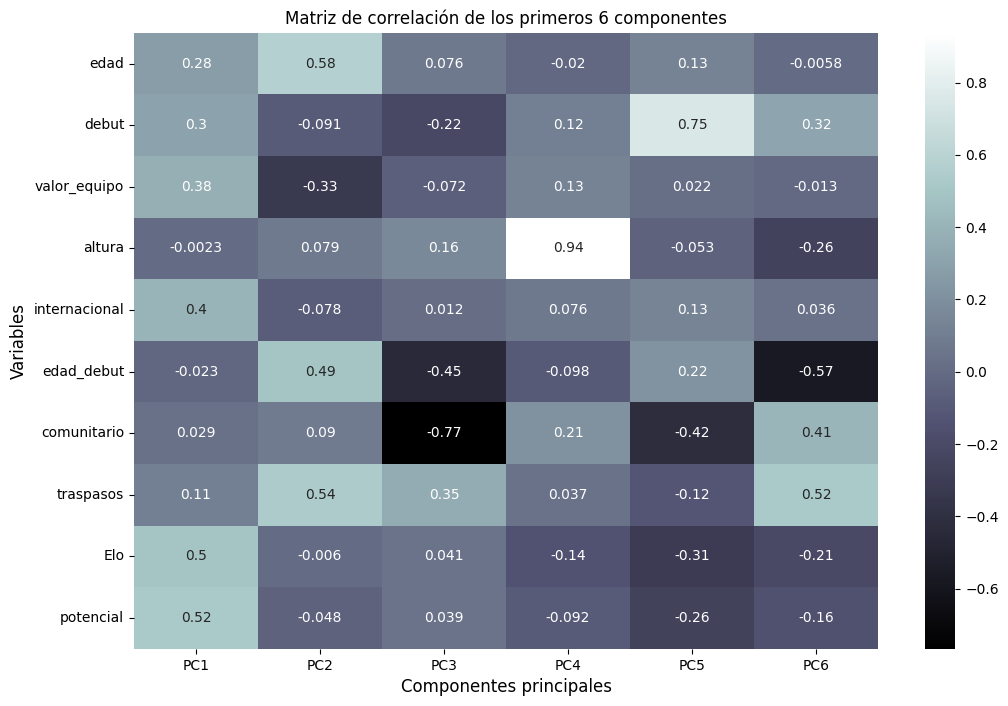

In [ ]:
# Visualización de las cargas para los 6 primeros componentes principales
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :6], cmap='bone', annot=True)
plt.title('Matriz de correlación de los primeros 6 componentes')
plt.xlabel('Componentes principales', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

Las variables con mayores cargas en PC1 y PC2 son particularmente interesantes, dado que estos componentes tienen los coeficientes de regresión más significativos. Por ejemplo, 'ELO' y 'potencial' tienen las mayores cargas positivas en PC1, sugiriendo que estas características son particularmente influyentes en el valor de mercado a través de este componente. Por otro lado, 'edad' y 'traspasos' tienen cargas significativas en PC2, indicando su importancia pero en una dirección que puede reducir el valor de mercado según el modelo.